# Landscape analysis

In [ ]:
import matplotlib as mpl
import numpy as np
import seaborn as sns
import swisslandstats as sls

import pylandstats as pls

Running the cell below is required so that the land use/land cover (LULC) data is downloaded and preprocessed (see [A03-swisslandstats-preprocessing.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/A03-swisslandstats-preprocessing.ipynb) for more details).

In [ ]:
!snakemake -c1 -d .. -s ../Snakefile lulc_tifs

We can load our landscape from a GeoTiff file:

In [ ]:
URBAN_CLASS_VAL = 1
AGRICULTURAL_CLASS_VAL = 2
input_filepath = "../data/processed/veveyse-AS18_4.tif"

In [ ]:
ls = pls.Landscape(input_filepath)

The SLS inventory distinguishes 27 land use/land cover classes, however, to simplify, this repository uses the classification aggregated into four main categories, i.e., *urban* (1), *agricultural* (3) *wooded areas* and (4) *unproductive areas*:

<Axes: >

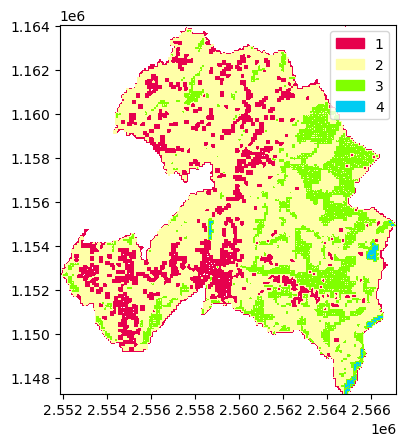

In [ ]:
ls.plot_landscape(cmap=sls.noas04_4_cmap, norm=sls.noas04_4_norm, legend=True)

## Computing metrics

The metrics can be computed at the patch, class and landscape level (see [the list of implemented metrics](https://pylandstats.readthedocs.io/en/latest/landscape.html#list-of-implemented-metrics))

### Patch-level metrics

The metrics can be computed at the patch level, that is, for each patch of the landscape:

In [ ]:
patch_metrics_df = ls.compute_patch_metrics_df()
patch_metrics_df.head()

,class_val,area,perimeter,perimeter_area_ratio,shape_index,fractal_dimension,euclidean_nearest_neighbor
patch_id,,,,,,,
0,1,1.0,400.0,400.0,1.0,1.0,360.555128
1,1,1.0,400.0,400.0,1.0,1.0,360.555128
2,1,1.0,400.0,400.0,1.0,1.0,200.000000
3,1,1.0,400.0,400.0,1.0,1.0,200.000000
4,1,1.0,400.0,400.0,1.0,1.0,424.264069


We can operate upon `patch_metrics_df` as with any other pandas DataFrame. In this case, there are 206 patches, of which 193 are *urban* and 13 *non-urban*, as noted respectively by the values of 1 and 2 within the `class_val` column:

In [ ]:
patch_metrics_df["class_val"].value_counts()

class_val
1    287
3    243
4     75
2     60
Name: count, dtype: int64

We might also use methods from other libraries, such as matplotlib or numpy. For instance, in order to explore the size distribution of patches, we can also plot the distribution of the logarithm of `area` for *urban* and *agricultural* classes as follows:

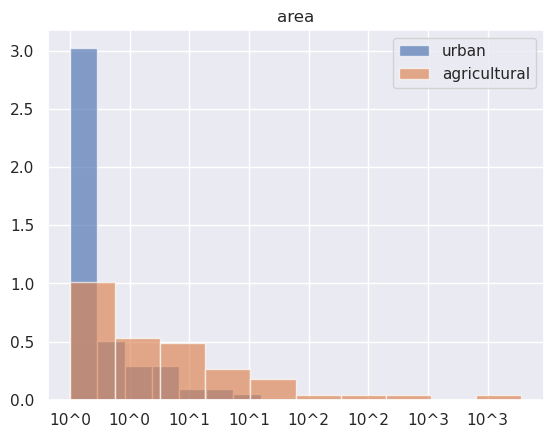

In [ ]:
# for better-looking histograms
sns.set_theme()

ax = (
    patch_metrics_df[patch_metrics_df["class_val"] == URBAN_CLASS_VAL]
    .apply(np.log10)
    .hist(column="area", label="urban", density=True, alpha=0.66)
)
patch_metrics_df[patch_metrics_df["class_val"] == AGRICULTURAL_CLASS_VAL].apply(
    np.log10
).hist(column="area", ax=ax, label="agricultural", density=True, alpha=0.66)

ax.item().get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: "10^%d" % x)
)
ax.item().legend()

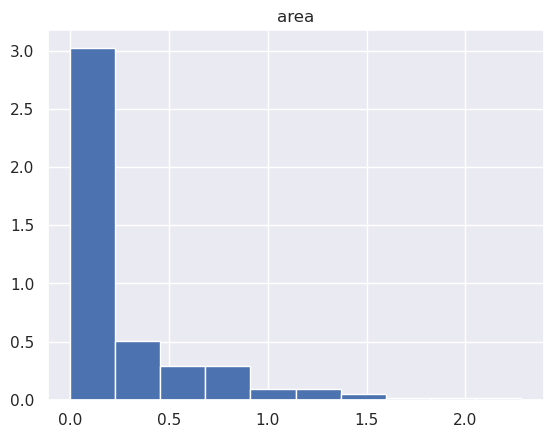

In [ ]:
ax = (
    patch_metrics_df[patch_metrics_df["class_val"] == 1]
    .apply(np.log10)
    .hist(column="area", label="urban", density=True)
)

<a id='class-metrics-df'></a>
### Class-level metrics

The metrics can also be computed at the class level, that is, aggregating over all patches of a land use/cover class

In [ ]:
class_metrics_df = ls.compute_class_metrics_df()
class_metrics_df

,total_area,proportion_of_landscape,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,effective_mesh_size,area_mn,...,fractal_dimension_md,fractal_dimension_ra,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv
class_val,,,,,,,,,,,,,,,,,,,,,
1,1041.0,7.749572,287,2.136529,1.421872,256600.0,19.102211,19.969231,3.877838,3.627178,...,1.000000,0.220343,0.045077,4.402981,309.244705,240.805397,223.606798,1100.000000,168.551251,54.504167
2,7559.0,56.271868,60,0.446661,44.807563,679700.0,50.599270,20.810345,2737.138614,125.983333,...,1.053496,0.311892,0.066308,6.247750,229.079970,203.046531,200.000000,624.621125,86.731582,37.860832
3,4560.0,33.946252,243,1.808978,23.040274,512700.0,38.167200,20.433824,720.249237,18.765432,...,1.000000,0.284597,0.051072,4.945558,253.299859,209.633359,223.606798,521.110255,77.749231,30.694542
4,273.0,2.032308,75,0.558327,0.528549,50000.0,3.722177,8.500000,0.619147,3.640000,...,1.000000,0.149061,0.032689,3.205601,552.835154,485.539111,360.555128,3124.154028,491.229708,88.856453


### Landscape-level metrics

Finally, the metrics can also be computed at the landscape level, that is, aggregating over all patches of the landscape

In [ ]:
landscape_metrics_df = ls.compute_landscape_metrics_df()
landscape_metrics_df

,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,effective_mesh_size,entropy,shannon_diversity_index,...,fractal_dimension_md,fractal_dimension_ra,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv
0,13433.0,665,4.950495,44.807563,749500.0,55.795429,18.273707,3461.884836,1.391901,0.964792,...,1.0,0.311892,0.049667,4.822265,309.0414,213.949783,223.606798,3124.154028,225.342246,72.916524


## Customizing the metrics DataFrames

<a id='subset-class-metrics-df'></a>
### Selecting the metrics to compute

Some metrics can be expensive to compute. If you are only interested in computing a subset of the metrics implemented within PyLandStats, you can specify it in each respective method, that is, `Landscape.compute_patch_metrics_df`, `Landscape.compute_patch_metrics_df` and/or `Landscape.compute_class_metrics_df` through the `metrics` argument (see [the documentation on "Computing metrics data frames"](https://pylandstats.readthedocs.io/en/latest/landscape.html#computing-metrics-data-frames). For instance:

In [ ]:
subset_class_metrics_df = ls.compute_class_metrics_df(
    metrics=["proportion_of_landscape", "edge_density"]
)
subset_class_metrics_df

,proportion_of_landscape,edge_density
class_val,,
1,7.749572,19.102211
2,56.271868,50.599270
3,33.946252,38.167200
4,2.032308,3.722177


### Customizing how each metric is computed

The default arguments correspond to how the metrics are defined within FRAGSTATS. Nevertheless, some metrics allow some variations in their definition. For instance, the `edge_density` above allows us to choose whether we consider the landscape boundary to be an edge (by default, as in FRAGSTATS, we do not, since we only consider edges between land use/cover classes), or whether we want the area to be converted to hectares (by default, as in FRAGSTATS, we do).

In [ ]:
print(
    "Edge density (without boundary, meters of edge per hectare):\n{}\n".format(
        ls.edge_density()
    )
)

print(
    "Edge density (with boundary, meters of edge per hectare):\n{}\n".format(
        ls.edge_density(count_boundary=True)
    )
)

print(
    "Edge density (with boundary, meters of edge per square meter):\n{}".format(
        ls.edge_density(count_boundary=True, hectares=False)
    )
)

Edge density (without boundary, meters of edge per hectare):
55.795429166976845

Edge density (with boundary, meters of edge per hectare):
63.120672969552594

Edge density (with boundary, meters of edge per square meter):
0.006312067296955259


For more details, see the documentation for each metric's method.

If we want to obtain a patch, class or landscape-level DataFrame with some customized metrics, instead of manually calling each metric's method with its respective parameters, we can use the `metrics_kws` argument of the `Landscape.compute_patch_metrics_df`, `Landscape.compute_patch_metrics_df` and/or `Landscape.compute_class_metrics_df` to set the keyword arguments to be passed to the some metric methods. For instance, if we wanted `proportion_of_landscape` as a fraction instead of a percentage and `edge_density` to include the boundary, we can do it as follows:

In [ ]:
custom_class_metrics_df = ls.compute_class_metrics_df(
    metrics_kws={
        "proportion_of_landscape": {"percent": False},
        "edge_density": {"count_boundary": True},
    }
)
custom_class_metrics_df

,total_area,proportion_of_landscape,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,effective_mesh_size,area_mn,...,fractal_dimension_md,fractal_dimension_ra,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv
class_val,,,,,,,,,,,,,,,,,,,,,
1,1041.0,0.077496,287,2.136529,1.421872,256600.0,19.325542,19.969231,3.877838,3.627178,...,1.000000,0.220343,0.045077,4.402981,309.244705,240.805397,223.606798,1100.000000,168.551251,54.504167
2,7559.0,0.562719,60,0.446661,44.807563,679700.0,53.912008,20.810345,2737.138614,125.983333,...,1.053496,0.311892,0.066308,6.247750,229.079970,203.046531,200.000000,624.621125,86.731582,37.860832
3,4560.0,0.339463,243,1.808978,23.040274,512700.0,41.375717,20.433824,720.249237,18.765432,...,1.000000,0.284597,0.051072,4.945558,253.299859,209.633359,223.606798,521.110255,77.749231,30.694542
4,273.0,0.020323,75,0.558327,0.528549,50000.0,4.302836,8.500000,0.619147,3.640000,...,1.000000,0.149061,0.032689,3.205601,552.835154,485.539111,360.555128,3124.154028,491.229708,88.856453


Note that the values for `proportion_of_landscape` and `edge_density` are different now than when we computed them with the default arguments for their respective methods (in the [class_metrics_df](#class-metrics-df) and [subset_class_metrics_df](#subset-class-metrics-df) above).

Note also that the `custom_class_metrics_df` does not only feature `proportion_of_landscape` and `edge_density` but features all the available metrics instead. This is because the `metrics_kws` argument does not imply that only the the metrics defined on it will be computed, only that the metrics defined on it will be computed with the specified arguments.

We might choose to only compute a reduced set of metrics, some of which with non-default arguments, by setting both the `metrics` and `metric_kws` arguments:

In [ ]:
custom_subset_class_metrics_df = ls.compute_class_metrics_df(
    metrics=["proportion_of_landscape", "edge_density", "fractal_dimension_am"],
    metrics_kws={
        "proportion_of_landscape": {"percent": False},
        "edge_density": {"count_boundary": True},
    },
)
custom_subset_class_metrics_df

,proportion_of_landscape,edge_density,fractal_dimension_am
class_val,,,
1,0.077496,19.325542,1.113777
2,0.562719,53.912008,1.287897
3,0.339463,41.375717,1.232546
4,0.020323,4.302836,1.073387


The same could be done for the `Landscape.compute_patch_metrics_df` or `Landscape.compute_landscape_metrics_df` methods. Check the documentation of each metric's method for more details on how they might be customized through their arguments.